# Perceptron from scratch

Live Coding of Perceptron 14/10/2022

<img src="imgs/Components_of_neuron.jpg/" width=auto height=500 />

**Dendrites** – are thin branches located in the nerve cell. These cells act on receiving nerve input from other parts of our body.

**Soma** – acts as a summation function. As positive and negative signals (exciting and inhibiting, respectively) arrive in the soma from the dendrites they are added together.

**Axon** – gets its signal from the summation behavior which occurs inside the soma. It is formed by a single extended filament located throughout the neuron. The axon is responsible for sending nerve impulses to the external environment of a cell.

The perceptron learns by calculating the prediction :

$\hat{y} = f(\vec{w}\cdot \vec{x} + b) = f(w_1 x_1 + w_2 x_2 + \dots + w_nx_n + b)$

After that, we update the weights and the bias using as :

- $\hat{w}_i = w_i + \alpha(y-\hat{y})x_i$,  where $i=1,\dots,n$
- $\hat{b} = b + \alpha(y-\hat{y})$

*Note : the equations above are to be computed on data observations (first row, second row, ...), hence the $w_i$ and $x_i$, and not as a Matrix multiplication.*

# Libary import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from perceptron import Perceptron
from utils import get_threshold, display_threshold

# Random data points

In [2]:
X = np.random.uniform(size=(600,2))
y = np.where(np.sum(X, axis=1)>1, 1, 0)

In [3]:
data = pd.DataFrame(columns=('x1', 'x2'), data=X)
data['y'] = y

# Call Perceptron for each observation

In [4]:
initial_weights = [0.1, 0.1]
initial_bias = 0.05
LearningRate = 0.1

SLP = Perceptron(weights=initial_weights, bias=initial_bias)

loss = 0
y_pred = []
for i, row in data.iterrows():
    loss = loss + SLP.Learning(row[0:2], row[2])
    y_pred.append(SLP.initial_output)

# Let's display data and threshold of Perceptron

Text(0.5, 1.0, 'Dummy data : Perceptron does linear classification')

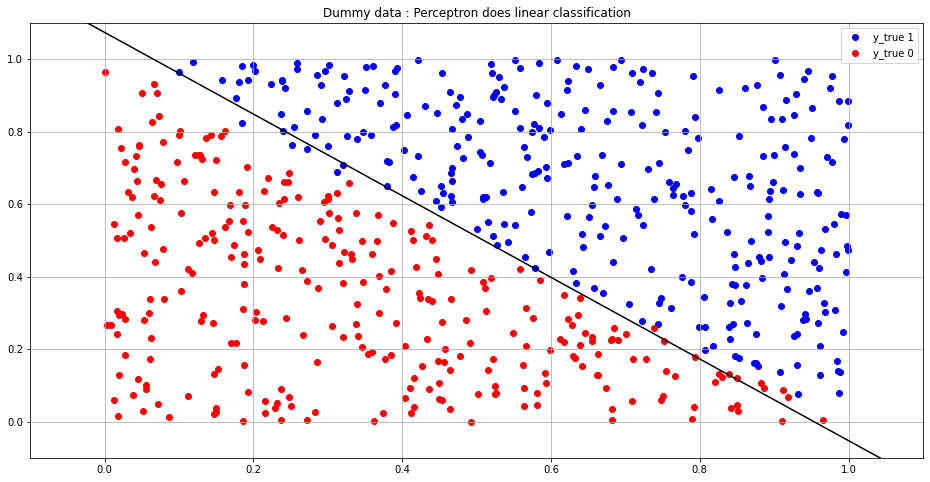

In [5]:
fig = plt.figure(figsize=(16,8))

plt.scatter(data[data.y==1]['x1'], data[data.y==1]['x2'], color='blue', label="y_true 1")
plt.scatter(data[data.y==0]['x1'], data[data.y==0]['x2'], color='red', label="y_true 0")

xlim = fig.gca().get_xlim()
display_threshold(SLP, ax=fig.gca(), xlim=xlim)
plt.grid()
plt.legend()
plt.title('Dummy data : Perceptron does linear classification')

# Display difference between $y_{true}$ and $y_{pred}$

In [6]:
data['y_pred'] = np.array(y_pred)

Text(0.5, 1.0, 'Dummy data : Difference between y_true and y_pred')

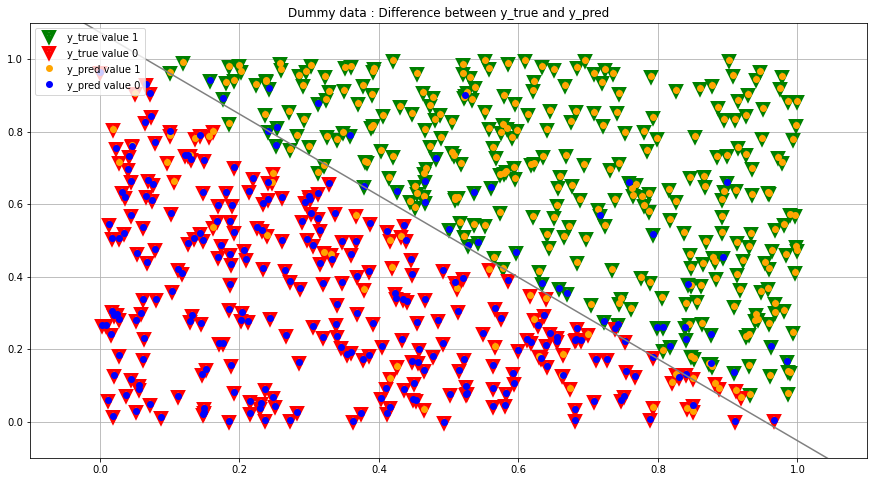

In [9]:
fig = plt.figure(figsize=(15,8))
fig.gca()
plt.plot(data[data.y==1]['x1'], data[data.y==1]['x2'], color='green', marker='v',linestyle="", label="y_true value 1", markeredgewidth=6)
plt.plot(data[data.y==0]['x1'], data[data.y==0]['x2'], color='red', marker='v',linestyle="", label="y_true value 0", markeredgewidth=6)

plt.plot(data[data.y_pred==1]['x1'], data[data.y_pred==1]['x2'], color='orange', marker='.',linestyle="", label="y_pred value 1", markeredgewidth=4)
plt.plot(data[data.y_pred==0]['x1'], data[data.y_pred==0]['x2'], color='blue', marker='.',linestyle="", label="y_pred value 0", markeredgewidth=4)


xlim = fig.gca().get_xlim()
display_threshold(SLP, ax=fig.gca(), xlim=xlim, color="gray")
plt.legend()
plt.grid()
plt.title('Dummy data : Difference between y_true and y_pred')